In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from utils import gridsearch_plot

import matplotlib.pyplot as plt
import seaborn as sns

from Schedulers import Adagrad
from LogisticRegression import LogisticRegression

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:

eta_list = [0.1, 0.01, 0.001, 0.0001]
lambda_list = [0.1, 0.01, 0.001, 0.0001]

epochs = 20
batch_size = 20

train_acc = np.zeros((len(eta_list), len(lambda_list)))
test_acc = np.zeros((len(eta_list), len(lambda_list)))

for i, eta in enumerate(eta_list):
	for j, lmbda in enumerate(lambda_list):
		scheduler = Adagrad(eta=eta)
		model = LogisticRegression(scheduler=scheduler, lmbda=lmbda)
		model.fit(X_train, y_train, epochs=100, batch_size=32)
		train_acc[i, j] = model.accuracy(X_train, y_train)
		test_acc[i, j] = model.accuracy(X_test, y_test)



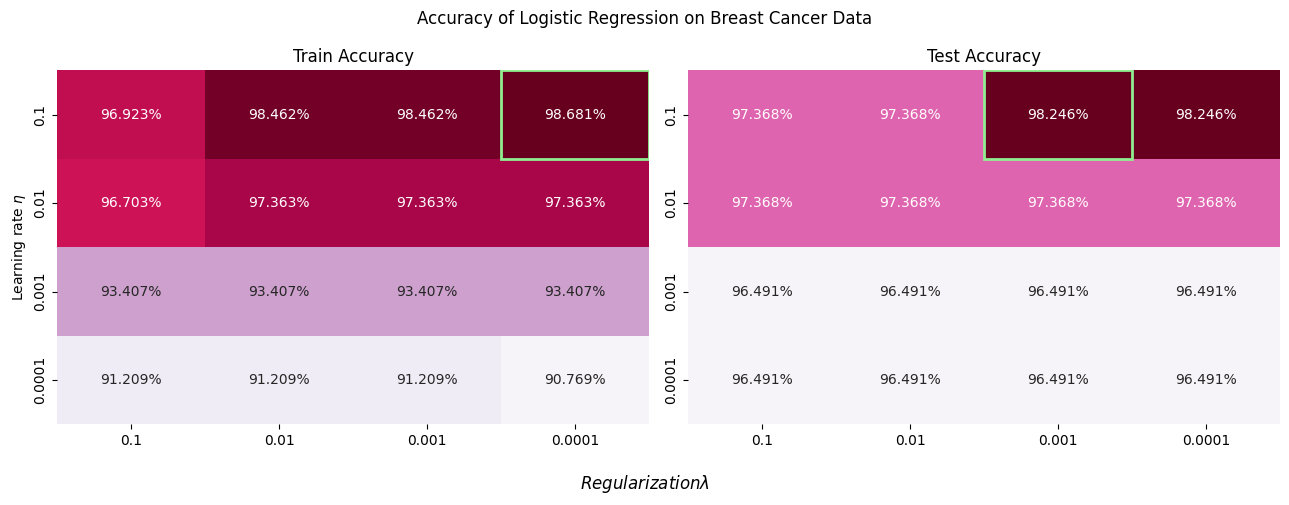

In [ ]:
fig, axs = gridsearch_plot((train_acc, test_acc), (eta_list, lambda_list), "PuRd", ("max", "max"), "lightgreen", ".3%", ".3%" )

fig.suptitle("Accuracy of Logistic Regression on Breast Cancer Data")
axs[0].set_title("Train Accuracy")
axs[1].set_title("Test Accuracy")
axs[0].set_ylabel(r"Learning rate $\eta$")
fig.supxlabel(r"$Regularization \lambda$")
plt.tight_layout()
# plt.savefig("../figs/logistic_regression_gridsearch.pdf")
plt.show()